In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt

# https://github.com/NickAlger/helper_functions/
from circle_mesh import circle_mesh
from plot_rectangle import plot_rectangle
from point_is_in_box import point_is_in_box
from pointcloud_nearest_neighbor import pointcloud_nearest_neighbor
from fenics_function_to_regular_grid_interpolator import FenicsFunctionToRegularGridInterpolator
from grid_interpolator import GridInterpolator
from conforming_box import conforming_box
from make_regular_grid import make_regular_grid

# https://github.com/NickAlger/helper_functions/blob/master/grid_interpolator.py
from grid_interpolator import GridInterpolator

In [2]:
mesh = circle_mesh(np.array([0.1,0.2]), 0.5, 0.05)
V = dl.FunctionSpace(mesh, 'CG', 2)

grid_min0 = np.array([0.1, 0.2])
grid_max0 = np.array([0.7, 0.6])

anchor_point = np.array([0.5, 0.4])

pp = V.tabulate_dof_coordinates()

inds_of_points_in_box0 = point_is_in_box(pp, grid_min0, grid_max0)
points_in_box0 = pp[inds_of_points_in_box0, :]

min_h = np.min(pointcloud_nearest_neighbor(points_in_box0, return_min_distances=True)[1])

h = min_h / 1.
# h = min_h *10

grid_min, grid_max, grid_shape = conforming_box(grid_min0, grid_max0, anchor_point, h)

inds_of_points_in_box = np.argwhere(point_is_in_box(pp, grid_min, grid_max)).reshape(-1)
points_in_box = pp[inds_of_points_in_box, :]

_, (X, Y) = make_regular_grid(grid_min, grid_max, grid_shape)

In [3]:
V_to_grid_interpolator = FenicsFunctionToRegularGridInterpolator(V)
grid_to_points_interpolator = GridInterpolator(grid_min, grid_max, grid_shape)

def V_to_grid(u):
    U = V_to_grid_interpolator.interpolate(u, grid_min, grid_max, grid_shape)
    return U

def grid_to_V(U):
    ubox_vec = grid_to_points_interpolator.interpolate(U, points_in_box)
    u = dl.Function(V)
    u.vector()[inds_of_points_in_box] = ubox_vec
    return u

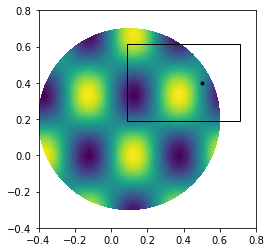

(-0.4, 0.8)

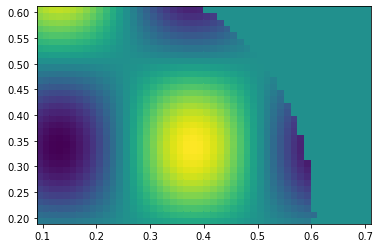

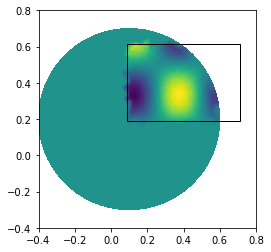

In [5]:
u_expr = dl.Expression('sin(4*pi*x[0])*cos(3*pi*x[1])', domain=mesh, degree=5)
u = dl.interpolate(u_expr, V)

fig = plt.figure()
ax = fig.add_subplot(111)
dl.plot(u)
plot_rectangle(grid_min, grid_max)
plt.plot(anchor_point[0], anchor_point[1], '.k')
# plt.scatter(X.reshape(-1), Y.reshape(-1))
plt.xlim(-0.4, 0.8)
plt.ylim(-0.4, 0.8)
plt.show()


U = V_to_grid(u)

plt.figure()
plt.pcolor(X, Y, U)


u2 = grid_to_V(U)

plt.figure()
dl.plot(u2)
plot_rectangle(grid_min, grid_max)
plt.xlim(-0.4, 0.8)
plt.ylim(-0.4, 0.8)